In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('hotel_reviews.xlsx')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


## Cleaning the data

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [5]:
df_neg = df.loc[df['Rating'] < 3]
df_neg = df_neg.reset_index(drop = True)

In [6]:
df_five = df.loc[df['Rating'] == 5]
df_five = df_five.reset_index(drop = True)

In [7]:
print(len(df_neg))

3214


In [8]:
print(len(df_five))

9054


In [9]:
df_pos = df_five.loc[:len(df_neg)]

In [10]:
len(df_pos)

3215

In [11]:
df_all = pd.concat([df_neg,df_pos], axis = 0)
df_all = df_all.reset_index(drop = True)

In [12]:
df_all.head()

,Review,Rating
0,ok nothing special charge diamond member hilto...,2
1,"poor value stayed monaco seattle july, nice ho...",2
2,horrible customer service hotel stay february ...,1
3,disappointed say anticipating stay hotel monac...,2
4,great location need internally upgrade advanta...,2


In [13]:
df_all.tail()

,Review,Rating
6424,perfect hotel hotel does not really need glowi...,5
6425,perfect hotel small hotel comfortable perfect ...,5
6426,ordinary location extraordinary hotel know lov...,5
6427,"classy indulgence awesome experience, staff n'...",5
6428,first-rate experience stay library hotel wife ...,5


In [14]:
len(df_all)

6429

## Create a Sentiments Column

In [15]:
df_all['Sentiment'] = np.where(df_all['Rating'] == 5, 'Positive','Negative')

In [16]:
df_all.head()

,Review,Rating,Sentiment
0,ok nothing special charge diamond member hilto...,2,Negative
1,"poor value stayed monaco seattle july, nice ho...",2,Negative
2,horrible customer service hotel stay february ...,1,Negative
3,disappointed say anticipating stay hotel monac...,2,Negative
4,great location need internally upgrade advanta...,2,Negative


In [17]:
df_all.tail()

,Review,Rating,Sentiment
6424,perfect hotel hotel does not really need glowi...,5,Positive
6425,perfect hotel small hotel comfortable perfect ...,5,Positive
6426,ordinary location extraordinary hotel know lov...,5,Positive
6427,"classy indulgence awesome experience, staff n'...",5,Positive
6428,first-rate experience stay library hotel wife ...,5,Positive


In [18]:
df_all = df_all.sample(frac = 1)
df_all = df_all.reset_index(drop = True)

In [19]:
df_all.head(10)

,Review,Rating,Sentiment
0,love melia stayed melia caribe tropical honeym...,5,Positive
1,dump dump dump rating place four-star-dump roo...,1,Negative
2,"ca n't wait, fiance simply loved resort, great...",5,Positive
3,disappointing stayed june having visited 5-6 y...,2,Negative
4,"marco polo stayed stop tour mexico, really lov...",5,Positive
5,great families arriving sf car family arrived ...,5,Positive
6,"best, love hotel, stayed trips amsterdam, not ...",5,Positive
7,"not expected wow, disappointment, thouroughly ...",2,Negative
8,"great spot san fran trip s.f, no idea stay, tr...",5,Positive
9,excellent hotel excellent service took son par...,5,Positive


## Split into test and train examples

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df_all.Review,df_all.Sentiment)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
v = CountVectorizer()
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

## Use classification model

### 1. SVM

In [24]:
from sklearn import svm
clf_svm = svm.SVC(kernel = 'linear')
clf_svm.fit(x_train_vec,y_train)

SVC(kernel='linear')

## Test accuracy

In [25]:
clf_svm.score(x_test_vec,y_test) 

0.9421641791044776

In [26]:
from sklearn.metrics import f1_score
f1_svm = f1_score(y_test,clf_svm.predict(x_test_vec), average = None)

In [27]:
rev = ['This place was beautiful,cant eait to come back']
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)

In [28]:
rev = ['Absolutely hated this place.Horrible food']
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)

# 2.Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [30]:
clf_logreg = LogisticRegression()

clf_logreg.fit(x_train_vec, y_train)
#y_pred = clf_logreg.predict(x_test_vec)

#accuracy = accuracy_score(y_test, y_pred)
accuracy = clf_logreg.score(x_test_vec, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")

#print("Classification Report:")
#print(classification_report(y_test, y_pred))

Accuracy on the test set: 0.95


In [31]:
f1_lg = f1_score(y_test, clf_logreg.predict(x_test_vec), average='weighted')
print(f"F1 Score on the test set: {f1_lg:.4f}")

F1 Score on the test set: 0.9521


# 3.Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [33]:
clf_nb = MultinomialNB()

clf_nb.fit(x_train_vec, y_train)
#y_pred = clf_nb.predict(x_test_vec)
#accuracy = accuracy_score(y_test, y_pred)
accuracy = clf_nb.score(x_test_vec, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")
#print("Classification Report:")
#print(classification_report(y_test, y_pred))

Accuracy on the test set: 0.96


In [34]:
f1_nb = f1_score(y_test, clf_nb.predict(x_test_vec), average='weighted')
print(f"F1 Score on the test set: {f1_nb:.4f}")

F1 Score on the test set: 0.9627


# 4.LSTM

In [35]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

#x_text = df_all['Review'].tolist()
#y_labels = df_all['Sentiment'].tolist()


tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
total_words = len(tokenizer.word_index) + 1

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

max_sequence_length = max(len(seq) for seq in sequences_train)
x_train_pad = pad_sequences(sequences_train, maxlen=max_sequence_length, padding='post')
x_test_pad = pad_sequences(sequences_test, maxlen=max_sequence_length, padding='post')

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


#lstm
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train_pad, y_train_encoded, epochs=2, batch_size=32, validation_data=(x_test_pad, y_test_encoded))

y_pred = (model.predict(x_test_pad) > 0.5).astype(int)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")




Epoch 1/2


151/151 [==============================] - 298s 2s/step - loss: 0.6939 - accuracy: 0.4910 - val_loss: 0.6936 - val_accuracy: 0.4857
Epoch 2/2
51/51 [==============================] - 13s 240ms/step
Accuracy on the test set: 0.49


In [36]:
f1_lstm = f1_score(y_test_encoded, y_pred)
print(f"F1 Score on the test set: {f1_lstm:.4f}")

F1 Score on the test set: 0.6538


## 5.CNN

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [38]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train_pad, y_train_encoded, epochs=2, batch_size=32, validation_data=(x_test_pad, y_test_encoded))

y_pred = (model.predict(x_test_pad) > 0.5).astype(int)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Epoch 1/2
151/151 [==============================] - 41s 268ms/step - loss: 0.4824 - accuracy: 0.8023 - val_loss: 0.2279 - val_accuracy: 0.9067
Epoch 2/2
51/51 [==============================] - 2s 36ms/step
Accuracy on the test set: 0.93


In [39]:
f1_cnn = f1_score(y_test_encoded, y_pred)
print(f"F1 Score on the test set: {f1_cnn:.4f}")

F1 Score on the test set: 0.9315


## 6.Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(x_train_vec, y_train)

y_pred = clf_rf.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.94


In [41]:
f1_rf = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score on the test set: {f1_rf:.4f}")

F1 Score on the test set: 0.9403


## 7.RNN

In [42]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [43]:
model.fit(x_train_pad, y_train_encoded, epochs=2, batch_size=32, validation_data=(x_test_pad, y_test_encoded))
y_pred = (model.predict(x_test_pad) > 0.5).astype(int)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Epoch 1/2
151/151 [==============================] - 40s 267ms/step - loss: 0.0404 - accuracy: 0.9919 - val_loss: 0.1489 - val_accuracy: 0.9434
Epoch 2/2
51/51 [==============================] - 2s 37ms/step
Accuracy on the test set: 0.94


In [44]:
f1_rnn = f1_score(y_test_encoded, y_pred)
print(f"F1 Score on the test set: {f1_rnn:.4f}")

F1 Score on the test set: 0.9401


## 8.Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf_gb.fit(x_train_vec, y_train)

y_pred = clf_gb.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.91


In [47]:
f1_gb = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score on the test set: {f1_gb:.4f}")

F1 Score on the test set: 0.9136


## Model Evaluation

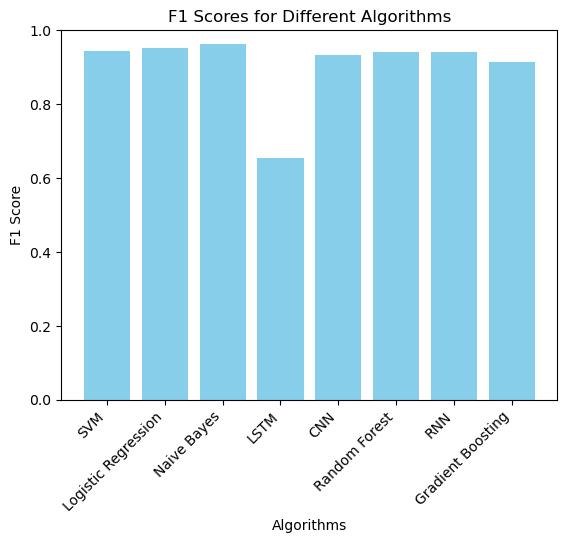

In [49]:
import matplotlib.pyplot as plt


# F1 scores for different algorithms
algorithms = ['SVM', 'Logistic Regression', 'Naive Bayes', 'LSTM', 'CNN', 'Random Forest', 'RNN', 'Gradient Boosting']
f1_scores = [f1_svm.mean(), f1_lg, f1_nb, f1_lstm, f1_cnn, f1_rf, f1_rnn, f1_gb]

# Plotting the bar graph
plt.bar(algorithms, f1_scores, color='skyblue')
plt.title('F1 Scores for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.ylim(0, 1.0)  # Assuming F1 scores are between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
df_all.to_excel('HOTEL_REVIEW.xlsx', index=False)